# Simulation of Radiative Capture

In [ ]:
%load_ext autoreload
%autoreload 2
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt
from pymatgen.analysis.defects.ccd import HarmonicDefect, RadiativeCatpture

TEST_FILES = Path("../tests/test_files/v_Ga/")

In [ ]:
!ls "../tests/test_files/v_Ga/ccd_0_-1/1"

POTCAR      PROCAR      WAVEDER     vasprun.xml


In [ ]:
rad_cap = RadiativeCatpture.from_directories(
    initial_dirs=[TEST_FILES / "ccd_0_-1" / str(i) for i in [0, 1, 2]],
    final_dirs=[TEST_FILES / "ccd_-1_0" / str(i) for i in [0, 1, 2]],
    waveder_dir=TEST_FILES / "ccd_0_-1" / "1",
    kpt_index=1,
    store_bandstructure=True,
)

/Users/shen9/repos/mp/pymatgen/pymatgen/io/vasp/inputs.py:1822: UnknownPotcarWarning: POTCAR with symbol Ga_d has metadata that does not match                          any VASP POTCAR known to pymatgen. The data in this                          POTCAR is known to match the following functionals:                          ['PBE_54', 'PBE_52', 'unvie_PBE_52']
  warnings.warn(
/Users/shen9/repos/mp/pymatgen/pymatgen/io/vasp/inputs.py:1822: UnknownPotcarWarning: POTCAR with symbol N has metadata that does not match                          any VASP POTCAR known to pymatgen. The data in this                          POTCAR is known to match the following functionals:                          ['PBE_54', 'PBE_52', 'unvie_PBE_52']
  warnings.warn(


In [ ]:
rad_cap.initial_state.spin_index

1

In [ ]:
rad_cap._get_defect_dipoles()[
    rad_cap.initial_state.defect_band_index : rad_cap.initial_state.defect_band_index
    + 3,
    rad_cap.initial_state.kpt_index,
    rad_cap.initial_state.spin_index,
    :,
]

array([[-2.3710303e-09+1.8139924e-09j,  1.2884794e-04-4.3552439e-10j,
         7.0389902e-04+8.6381546e-10j],
       [ 2.5248382e+00+1.5214415e+00j,  1.9807255e-08-2.6426321e-07j,
         3.6453662e-07+3.8197081e-07j],
       [ 8.5527748e-02+4.5592081e-02j, -1.3496606e-07-2.4558861e-07j,
         3.6287055e-08-2.4894685e-08j]], dtype=complex64)

In [ ]:
rad_cap.get_coeff?

Signature:
rad_cap.get_coeff(
    T: 'float | npt.ArrayLike',
    dE: 'float',
    omega_photon: 'float',
    volume: 'float | None' = None,
    g: 'int' = 1,
    occ_tol: 'float' = 0.001,
    n_band_edge: 'int' = 1,
)
Docstring: Calculate the SRH recombination coefficient.
File:      ~/repos/mp/pymatgen-analysis-defects/pymatgen/analysis/defects/ccd.py
Type:      method


In [ ]:
T = np.linspace(100, 1000, 20)
rc = rad_cap.get_coeff(T, 0.7, 0.4)

Text(0, 0.5, 'Radiative Capture Rate\n[Arb. Units]')

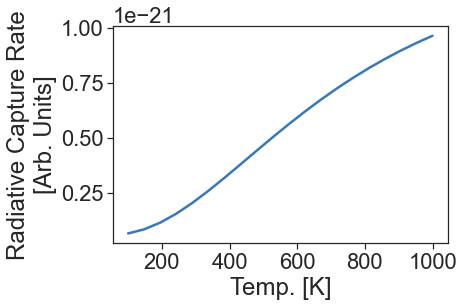

In [ ]:
plt.plot(T, rc)
plt.xlabel("Temp. [K]")
plt.ylabel("Radiative Capture Rate\n[Arb. Units]")
# plt.yticks([])

In [ ]:
rad_cap.initial_state.omega

0.505465736152237

# Sanity Checks

In [ ]:
from copy import deepcopy

fake_final = deepcopy(rad_cap.initial_state)
fake_final.charge_state = -1
fake_final2 = deepcopy(rad_cap.initial_state)
fake_final2.charge_state = -1
fake_final2.omega = 0.7

/Users/shen9/local/Caskroom/miniconda/base/envs/mp/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


([], [])

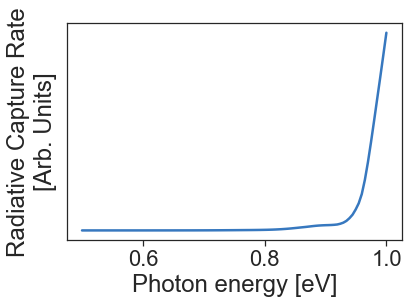

In [ ]:
rcap = RadiativeCatpture(
    initial_state=rad_cap.initial_state,
    final_state=fake_final2,
    dQ=0.0,
    waveder=rad_cap.waveder,
)
dE = 1.0
omega_photon = np.linspace(0.5, 1.0, 100)
res = [rcap.get_coeff(T=600, dE=dE, omega_photon=op) for op in omega_photon]
plt.plot(omega_photon, res)
plt.xlabel("Photon energy [eV]")
plt.ylabel("Radiative Capture Rate\n[Arb. Units]")
plt.yticks([])

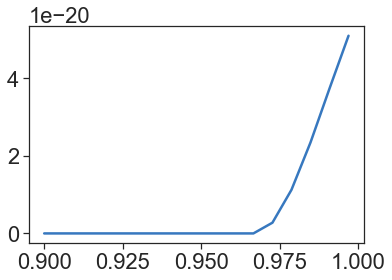

In [ ]:
rcap = RadiativeCatpture(
    initial_state=rad_cap.initial_state,
    final_state=fake_final,
    dQ=0.0,
    waveder=rad_cap.waveder,
)
dE = 1.0
omega_photon = np.linspace(0.9, 1.5, 100)
res = [rcap.get_coeff(T=600, dE=dE, omega_photon=op) for op in omega_photon]
plt.plot(omega_photon, res)

/Users/shen9/local/Caskroom/miniconda/base/envs/mp/lib/python3.10/site-packages/numpy/ma/core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


([], [])

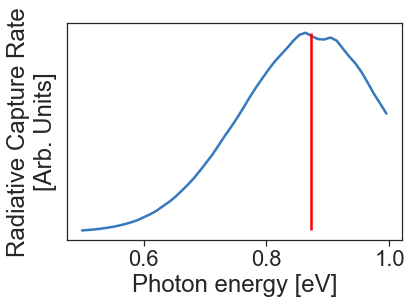

In [ ]:
rcap = RadiativeCatpture(
    initial_state=rad_cap.initial_state,
    final_state=fake_final,
    dQ=1.0,
    waveder=rad_cap.waveder,
)
dE = 1.0
omega_photon = np.linspace(0.5, 1.5, 100)
res = [rcap.get_coeff(T=600, dE=dE, omega_photon=op) for op in omega_photon]
plt.plot(omega_photon, res)
plt.vlines(0.8722521947880386, min(res), max(res), colors="red")
plt.xlabel("Photon energy [eV]")
plt.ylabel("Radiative Capture Rate\n[Arb. Units]")
plt.yticks([])

Text(0, 0.5, 'Energy [eV]')

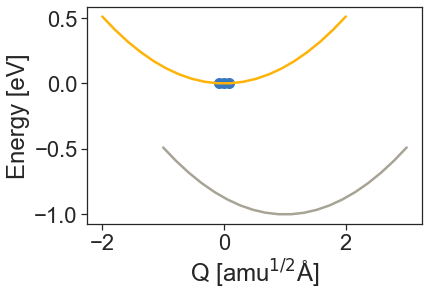

In [ ]:
hd0 = rad_cap.initial_state

plt.plot(
    hd0.distortions,
    (np.array(hd0.energies) - hd0.energies[hd0.relaxed_index]),
    "o",
    ms=10,
)

xx = np.linspace(-2, 2, 20)
yy = 0.5 * hd0.omega**2 * xx**2

xx2 = np.linspace(-2, 2, 20) + 1
yy2 = 0.5 * hd0.omega**2 * xx**2 - 1

plt.plot(xx, yy)
plt.plot(xx2, yy2)
plt.xlabel("Q [amu$^{1/2}$Å]")
plt.ylabel("Energy [eV]")

Text(0, 0.5, 'Energy [eV]')

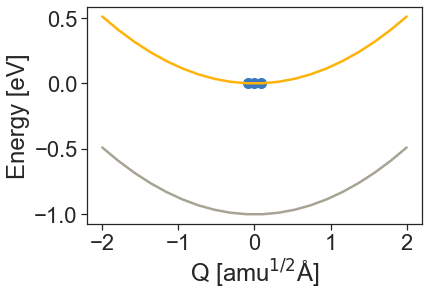

In [ ]:
hd0 = rad_cap.initial_state

plt.plot(
    hd0.distortions,
    (np.array(hd0.energies) - hd0.energies[hd0.relaxed_index]),
    "o",
    ms=10,
)

xx = np.linspace(-2, 2, 20)
yy = 0.5 * hd0.omega**2 * xx**2

xx2 = np.linspace(-2, 2, 20) + 1
yy2 = 0.5 * hd0.omega**2 * xx**2 - 1

plt.plot(xx, yy)
plt.plot(xx2-1, yy2)
plt.xlabel("Q [amu$^{1/2}$Å]")
plt.ylabel("Energy [eV]")

In [ ]:
1 - 0.5 * hd0.omega**2 * 1**2

0.8722521947880386

In [ ]:
import crystal_toolkit

/Users/shen9/repos/mp/pymatgen/pymatgen/analysis/phase_diagram.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
import crystal_toolkit
from pymatgen.analysis.graphs import StructureGraph
from pymatgen.analysis.local_env import CrystalNN
from pymatgen.core import Structure


def view(ss):
    return StructureGraph.with_local_env_strategy(ss, CrystalNN()).get_scene()

In [ ]:
struct = Structure.from_file("/Users/shen9/Desktop/CONTCAR.vasp")

In [ ]:
a = 1
struct.to("poscar", "/Users/shen9/Desktop/tmp.vasp")

In [ ]:
struct = Structure.from_file("/Users/shen9/Desktop/tmp.vasp")

TypeError: IStructure.from_file() got an unexpected keyword argument 'validate_proximity'

In [ ]:
4 & -4

4

In [ ]:
5 & -5

1

In [ ]:
6 & -6

2

In [ ]:
24 & -24

8

In [ ]:
bin(24)

'0b11000'

In [ ]:
bin(-24)

'-0b11000'

In [ ]:
x = 25

In [ ]:
~x+1

-25

In [ ]:
x

25

In [ ]:
x & (x - 1)

0

In [ ]:
x = 32
x & (x - 1)

0

In [ ]:
42 / 2

21.0

In [ ]:
n = 17
n & -n

1

In [ ]:
(n & -n)

16